In [ ]:
import numpy as np
import pandas as pd
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
!pip install datasets
from datasets import Dataset

In [ ]:
# from tensorflow.keras.mixed_precision import set_global_policy
# set_global_policy("mixed_float16")

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140


In [ ]:
import pandas as pd
import os

csv_file_path = os.path.join(path, 'training.1600000.processed.noemoticon.csv')
df=pd.read_csv(csv_file_path,engine='python', on_bad_lines='skip', encoding='latin-1', header=None)

In [ ]:
df.columns=['target','id','date','query','user','text']
df.head()

,target,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df["target"].value_counts()

,count
target,
0,800000
4,800000


In [ ]:
df.drop(['id','date','query','user'],axis=1,inplace=True)
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df['text']=df['text'].str.lower()
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df['target']=df['target'].apply(lambda x: 1 if x==4 else x)
df.tail()

,target,text
1599995,1,just woke up. having no school is the best fee...
1599996,1,thewdb.com - very cool to hear old walt interv...
1599997,1,are you ready for your mojo makeover? ask me f...
1599998,1,happy 38th birthday to my boo of alll time!!! ...
1599999,1,happy #charitytuesday @thenspcc @sparkscharity...


In [ ]:
sample_size = int(len(df)*0.05)
df_new = df.sample(sample_size, random_state=23)
df_new.shape

(80000, 2)

In [ ]:
df_new["target"].value_counts()

,count
target,
0,40070
1,39930


In [ ]:
import re

In [ ]:
def remove_usernames(text):
  clean = re.compile(r'@[A-Za-z]+')
  return clean.sub('', text)

In [ ]:
def remove_links(text):
  clean = re.compile(r'http[^\s]+|(https[^\s]+)|www.[^\s]+')
  return clean.sub('', text)

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df_new["text"] = df_new["text"].apply(remove_usernames)
df_new["text"] = df_new["text"].apply(remove_links)
df_new["text"] = df_new["text"].apply(remove_emoji)
df_new.head()

,target,text
1055148,1,yesterday was a fun day i love my work.
205169,0,swfwheel ???? js ? externalinterface ?????????...
214746,0,", i could of sworn it was otown, ugh i suck! i..."
367135,0,aw has gone
985037,1,i guess i should feel special that alfie nearl...


In [ ]:
bert_model=TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
bert_tokenizer=AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
  source_ids = bert_tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

  return{
      "input_ids": source_ids["input_ids"],
      "token_type_ids": source_ids["token_type_ids"],
      "attention_mask": source_ids["attention_mask"],
      "labels": examples["target"]
  }
  # return bert_tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

In [ ]:
# X=df_new['text']
# y=df_new['target']

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

df_new_train, df_new_test = train_test_split(df_new, test_size=0.2, random_state=42)

In [ ]:
df_new_train.head()

,target,text
60214,0,"i am so tired of work nothing to do for now, ..."
1447465,1,lol and look! speak of the devil himself
1514059,1,"agree,though i'm torn as it makes sense but t..."
1478710,1,78 the pleasure was all mine
887578,1,"happy to be home, had sunburst fried chicken, ..."


In [ ]:
df_new_test.head()

,target,text
70417,0,why are you going to perth and not coming to ...
668250,0,thank you for your greetings for pancake! she ...
167843,0,i can't go tonight *cait*
315930,0,got waken up by hayfever
962392,1,i just 1350 pointed fallout 3


In [ ]:
# Convert the pandas DataFrame to a datasets Dataset
df_train = Dataset.from_pandas(df_new_train)
df_test = Dataset.from_pandas(df_new_test)

# Now call the map function on the datasets Dataset object
df_preprocessed_train = df_train.map(preprocess_function, batched=True)
df_preprocessed_test = df_test.map(preprocess_function, batched=True)

Map:   0%|          | 0/64000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": df_preprocessed_train["input_ids"],
        "attention_mask": df_preprocessed_train["attention_mask"],
        "token_type_ids": df_preprocessed_train["token_type_ids"]
    },
    df_preprocessed_train["labels"]
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": df_preprocessed_test["input_ids"],
        "attention_mask": df_preprocessed_test["attention_mask"],
        "token_type_ids": df_preprocessed_test["token_type_ids"]
    },
    df_preprocessed_test["labels"]
)).batch(16)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction="none")
metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
bert_model.compile(optimizer=optimizer,loss=loss,metrics=metrics)

In [ ]:
history=bert_model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
4000/4000 [==============================] - 1813s 442ms/step - loss: 0.4079 - accuracy: 0.8133 - val_loss: 0.3721 - val_accuracy: 0.8363
Epoch 2/5
4000/4000 [==============================] - 1765s 441ms/step - loss: 0.2726 - accuracy: 0.8887 - val_loss: 0.4330 - val_accuracy: 0.8346
Epoch 3/5
4000/4000 [==============================] - 1763s 441ms/step - loss: 0.1621 - accuracy: 0.9395 - val_loss: 0.5573 - val_accuracy: 0.8248
Epoch 4/5
4000/4000 [==============================] - 1764s 441ms/step - loss: 0.1072 - accuracy: 0.9621 - val_loss: 0.6637 - val_accuracy: 0.8248
Epoch 5/5
4000/4000 [==============================] - 1763s 441ms/step - loss: 0.0781 - accuracy: 0.9724 - val_loss: 0.7585 - val_accuracy: 0.8298


In [ ]:
import matplotlib.pyplot as plt

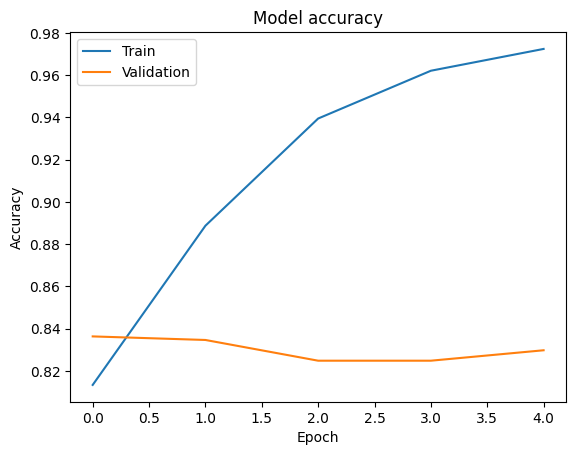

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

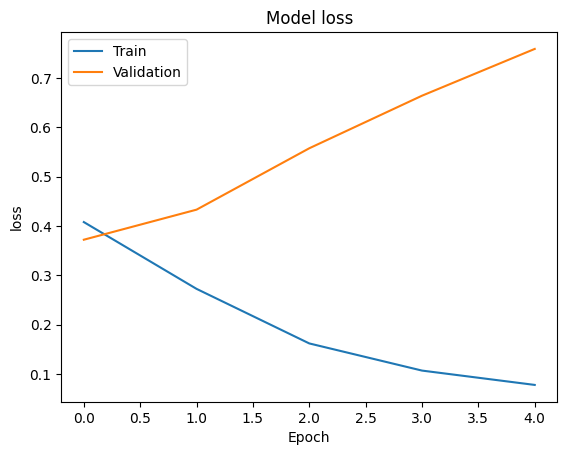

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
bert_model.save_pretrained('bert_twitter_sentiment_model')

In [ ]:
bert_tokenizer.save_pretrained('bert_twitter_sentiment_tokenizer')

('bert_twitter_sentiment_tokenizer/tokenizer_config.json',
 'bert_twitter_sentiment_tokenizer/special_tokens_map.json',
 'bert_twitter_sentiment_tokenizer/vocab.txt',
 'bert_twitter_sentiment_tokenizer/added_tokens.json',
 'bert_twitter_sentiment_tokenizer/tokenizer.json')

In [ ]:
!cp -r bert_twitter_sentiment_model /content/drive/MyDrive/

In [ ]:
!cp -r bert_twitter_sentiment_tokenizer /content/drive/MyDrive/

In [ ]:
y_test=df_new_test['target']
y_pred=bert_model.predict(df_new_test['text'])

y_pred=np.argmax(y_pred.logits,axis=1)
y_pred, y_test

TypeError: in user code:

    File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 2436, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 2421, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 2409, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 2377, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_fileuh5ve6t4.py", line 40, in tf__run_call_with_unpacked_inputs
        raise
    File "/tmp/__autograph_generated_filefq3gdxxw.py", line 17, in tf__call
        outputs = ag__.converted_call(ag__.ld(self).bert, (), dict(input_ids=ag__.ld(input_ids), attention_mask=ag__.ld(attention_mask), token_type_ids=ag__.ld(token_type_ids), position_ids=ag__.ld(position_ids), head_mask=ag__.ld(head_mask), inputs_embeds=ag__.ld(inputs_embeds), output_attentions=ag__.ld(output_attentions), output_hidden_states=ag__.ld(output_hidden_states), return_dict=ag__.ld(return_dict), training=ag__.ld(training)), fscope)
    File "/tmp/__autograph_generated_fileuh5ve6t4.py", line 40, in tf__run_call_with_unpacked_inputs
        raise
    File "/tmp/__autograph_generated_filec7uh6o6w.py", line 127, in tf__call
        embedding_output = ag__.converted_call(ag__.ld(self).embeddings, (), dict(input_ids=ag__.ld(input_ids), position_ids=ag__.ld(position_ids), token_type_ids=ag__.ld(token_type_ids), inputs_embeds=ag__.ld(inputs_embeds), past_key_values_length=ag__.ld(past_key_values_length), training=ag__.ld(training)), fscope)
    File "/tmp/__autograph_generated_filep95_qza9.py", line 46, in tf__call
        ag__.if_stmt(ag__.ld(input_ids) is not None, if_body_1, else_body_1, get_state_1, set_state_1, ('inputs_embeds',), 1)
    File "/tmp/__autograph_generated_filep95_qza9.py", line 40, in if_body_1
        ag__.converted_call(ag__.ld(check_embeddings_within_bounds), (ag__.ld(input_ids), ag__.ld(self).config.vocab_size), None, fscope)
    File "/tmp/__autograph_generated_file7psxi_yk.py", line 17, in tf__check_embeddings_within_bounds
        ag__.converted_call(ag__.ld(tf).debugging.assert_less, (ag__.ld(tensor), ag__.converted_call(ag__.ld(tf).cast, (ag__.ld(embed_dim),), dict(dtype=ag__.ld(tensor).dtype), fscope)), dict(message=f"The maximum value of {ag__.ld(tensor_name)} ({ag__.converted_call(ag__.ld(tf).math.reduce_max, (ag__.ld(tensor),), None, fscope)}) must be smaller than the embedding layer's input dimension ({ag__.ld(embed_dim)}). The likely cause is some problem at tokenization time."), fscope)

    TypeError: Exception encountered when calling layer 'tf_bert_for_sequence_classification' (type TFBertForSequenceClassification).
    
    in user code:
    
        File "/usr/local/lib/python3.11/dist-packages/transformers/modeling_tf_utils.py", line 1734, in run_call_with_unpacked_inputs  *
            return func(self, **unpacked_inputs)
        File "/usr/local/lib/python3.11/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 1746, in call  *
            outputs = self.bert(
        File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/tmp/__autograph_generated_fileuh5ve6t4.py", line 40, in tf__run_call_with_unpacked_inputs
            raise
        File "/tmp/__autograph_generated_filec7uh6o6w.py", line 127, in tf__call
            embedding_output = ag__.converted_call(ag__.ld(self).embeddings, (), dict(input_ids=ag__.ld(input_ids), position_ids=ag__.ld(position_ids), token_type_ids=ag__.ld(token_type_ids), inputs_embeds=ag__.ld(inputs_embeds), past_key_values_length=ag__.ld(past_key_values_length), training=ag__.ld(training)), fscope)
        File "/tmp/__autograph_generated_filep95_qza9.py", line 46, in tf__call
            ag__.if_stmt(ag__.ld(input_ids) is not None, if_body_1, else_body_1, get_state_1, set_state_1, ('inputs_embeds',), 1)
        File "/tmp/__autograph_generated_filep95_qza9.py", line 40, in if_body_1
            ag__.converted_call(ag__.ld(check_embeddings_within_bounds), (ag__.ld(input_ids), ag__.ld(self).config.vocab_size), None, fscope)
        File "/tmp/__autograph_generated_file7psxi_yk.py", line 17, in tf__check_embeddings_within_bounds
            ag__.converted_call(ag__.ld(tf).debugging.assert_less, (ag__.ld(tensor), ag__.converted_call(ag__.ld(tf).cast, (ag__.ld(embed_dim),), dict(dtype=ag__.ld(tensor).dtype), fscope)), dict(message=f"The maximum value of {ag__.ld(tensor_name)} ({ag__.converted_call(ag__.ld(tf).math.reduce_max, (ag__.ld(tensor),), None, fscope)}) must be smaller than the embedding layer's input dimension ({ag__.ld(embed_dim)}). The likely cause is some problem at tokenization time."), fscope)
    
        TypeError: Exception encountered when calling layer 'bert' (type TFBertMainLayer).
        
        in user code:
        
            File "/usr/local/lib/python3.11/dist-packages/transformers/modeling_tf_utils.py", line 1734, in run_call_with_unpacked_inputs  *
                return func(self, **unpacked_inputs)
            File "/usr/local/lib/python3.11/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 887, in call  *
                embedding_output = self.embeddings(
            File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/utils/traceback_utils.py", line 70, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
            File "/tmp/__autograph_generated_filep95_qza9.py", line 46, in tf__call
                ag__.if_stmt(ag__.ld(input_ids) is not None, if_body_1, else_body_1, get_state_1, set_state_1, ('inputs_embeds',), 1)
            File "/tmp/__autograph_generated_filep95_qza9.py", line 40, in if_body_1
                ag__.converted_call(ag__.ld(check_embeddings_within_bounds), (ag__.ld(input_ids), ag__.ld(self).config.vocab_size), None, fscope)
            File "/tmp/__autograph_generated_file7psxi_yk.py", line 17, in tf__check_embeddings_within_bounds
                ag__.converted_call(ag__.ld(tf).debugging.assert_less, (ag__.ld(tensor), ag__.converted_call(ag__.ld(tf).cast, (ag__.ld(embed_dim),), dict(dtype=ag__.ld(tensor).dtype), fscope)), dict(message=f"The maximum value of {ag__.ld(tensor_name)} ({ag__.converted_call(ag__.ld(tf).math.reduce_max, (ag__.ld(tensor),), None, fscope)}) must be smaller than the embedding layer's input dimension ({ag__.ld(embed_dim)}). The likely cause is some problem at tokenization time."), fscope)
        
            TypeError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).
            
            in user code:
            
                File "/usr/local/lib/python3.11/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 181, in call  *
                    check_embeddings_within_bounds(input_ids, self.config.vocab_size)
                File "/usr/local/lib/python3.11/dist-packages/transformers/tf_utils.py", line 190, in check_embeddings_within_bounds  *
                    tf.debugging.assert_less(
            
                TypeError: Value passed to parameter 'input' has DataType string not in list of allowed values: float32, float64, int32, uint8, int16, int8, int64, bfloat16, uint16, float16, uint32, uint64, qint8, quint8, qint32, qint16, quint16
            
            
            Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
              • input_ids=tf.Tensor(shape=(32, 1), dtype=string)
              • position_ids=None
              • token_type_ids=tf.Tensor(shape=(32, 1), dtype=int32)
              • inputs_embeds=None
              • past_key_values_length=0
              • training=False
        
        
        Call arguments received by layer 'bert' (type TFBertMainLayer):
          • input_ids=tf.Tensor(shape=(32, 1), dtype=string)
          • attention_mask=None
          • token_type_ids=None
          • position_ids=None
          • head_mask=None
          • inputs_embeds=None
          • encoder_hidden_states=None
          • encoder_attention_mask=None
          • past_key_values=None
          • use_cache=None
          • output_attentions=False
          • output_hidden_states=False
          • return_dict=True
          • training=False
    
    
    Call arguments received by layer 'tf_bert_for_sequence_classification' (type TFBertForSequenceClassification):
      • input_ids=tf.Tensor(shape=(32, 1), dtype=string)
      • attention_mask=None
      • token_type_ids=None
      • position_ids=None
      • head_mask=None
      • inputs_embeds=None
      • output_attentions=None
      • output_hidden_states=None
      • return_dict=None
      • labels=None
      • training=False


In [ ]:
train_df=pd.DataFrame({'text': X_train, 'labels': y_train})
test_df=pd.DataFrame({'text': X_test, 'labels': y_test})

In [ ]:
train_huggingface_df = Dataset.from_pandas(train_df)
test_huggingface_df = Dataset.from_pandas(test_df)

# Tokenize in batches
train_huggingface_df= train_huggingface_df.map(
    preprocess_function,
    batched=True,
    batch_size=16  # Adjust based on your RAM/GPU constraints
)

test_huggingface_df  = test_huggingface_df.map(
    preprocess_function,
    batched=True,
    batch_size=16  # Adjust based on your RAM/GPU constraints
)

# Convert to TensorFlow-compatible format
train_huggingface_df.set_format(type="numpy", columns=["input_ids", "attention_mask", "token_type_ids", "labels"])
test_huggingface_df.set_format(type="numpy", columns=["input_ids", "attention_mask", "token_type_ids", "labels"])

train_dataset = train_huggingface_df.to_tf_dataset(
    columns=["input_ids", "attention_mask", "token_type_ids"],
    label_cols=["labels"],  # Replace with your label column name
    batch_size=32,          # Adjust based on RAM
    shuffle=True
)

test_dataset = test_huggingface_df.to_tf_dataset(
    columns=["input_ids", "attention_mask", "token_type_ids"],
    label_cols=["labels"],
    batch_size=32
)

Map:   0%|          | 0/64000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/arrow_dataset.py:405: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
input_ids=tf.keras.layers.Input(shape=(128,),dtype=tf.int32,name='input_ids')
token_type_ids=tf.keras.layers.Input(shape=(128,),dtype=tf.int32,name='token_type_ids')
attention_mask=tf.keras.layers.Input(shape=(128,),dtype=tf.int32,name='attention_mask')
# Correct way to pass inputs to HuggingFace BERT model
outputs = bert_model(
    input_ids=input_ids,
    token_type_ids=token_type_ids,
    attention_mask=attention_mask
)
net_outputs=outputs['pooler_output']
net_outputs=keras.layers.Dropout(0.1)(net_outputs)
net_outputs=keras.layers.Dense(1,activation='sigmoid')(net_outputs)
model=keras.Model(inputs=[input_ids,token_type_ids,attention_mask],outputs=net_outputs)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 token_type_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                              

In [ ]:
# bert_model.trainable = False
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# num_rows=X_train.shape[0]
# X_train_input_ids=[]
# X_train_token_type=[]
# X_train_attention=[]
# for i in range(num_rows):
#   X_train_input_ids.append(X_train.iloc[i]['input_ids'])
#   X_train_token_type.append(X_train.iloc[i]['token_type_ids'])
#   X_train_attention.append(X_train.iloc[i]['attention_mask'])

# X_train_input_ids=np.array(X_train_input_ids)
# X_train_token_type=np.array(X_train_token_type)
# X_train_attention=np.array(X_train_attention)

# test_num_rows=X_test.shape[0]
# X_test_input_ids=[]
# X_test_token_type=[]
# X_test_attention=[]

# for i in range(test_num_rows):
#   X_test_input_ids.append(X_test.iloc[i]['input_ids'])
#   X_test_token_type.append(X_test.iloc[i]['token_type_ids'])
#   X_test_attention.append(X_test.iloc[i]['attention_mask'])

# X_test_input_ids=np.array(X_test_input_ids)
# X_test_token_type=np.array(X_test_token_type)
# X_test_attention=np.array(X_test_attention)


In [ ]:
# # Extract input_ids, token_type_ids, attention_mask from X_train
# X_train_input_ids = np.array(X_train['0'].apply(lambda x: x['input_ids']).tolist())
# X_train_token_type = np.array(X_train['0'].apply(lambda x: x['token_type_ids']).tolist())
# X_train_attention = np.array(X_train['text'].apply(lambda x: x['attention_mask']).tolist())

# # Repeat for X_test
# X_test_input_ids = np.array(X_test['text'].apply(lambda x: x['input_ids']).tolist())
# X_test_token_type = np.array(X_test['text'].apply(lambda x: x['token_type_ids']).tolist())
# X_test_attention = np.array(X_test['text'].apply(lambda x: x['attention_mask']).tolist())

In [ ]:
history = model.fit(epochs=5,x=train_dataset,validation_data=test_dataset)

Epoch 1/4
2000/2000 [==============================] - 1754s 857ms/step - loss: 0.7247 - accuracy: 0.5006 - val_loss: 0.7136 - val_accuracy: 0.5013
Epoch 2/4
1019/2000 [==============>...............] - ETA: 12:53 - loss: 0.7160 - accuracy: 0.4950